<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [2]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [6]:
# Load the Stack Overflow survey dataset
file_name = 'survey_data.csv'
df = pd.read_csv(file_name)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [14]:
## Write your code here
print("The number of missing values in Employment column:")
print(df['Employment'].isnull().sum())
print("\nThe number of missing values in JobSat column:")
print(df['JobSat'].isnull().sum())
print("\nThe number of missing values in RemoteWork column:")
print(df['RemoteWork'].isnull().sum())
print("\nThe number of each values in RemoteWork column:")
print(df['RemoteWork'].value_counts())
# for the JobSat column we can drop the whole column
# df = df.drop(columns=['JobSat'])
# and for the RemoteWork column we can fill the missing values with 'No', since the majority of respondents are not working remotely
df['RemoteWork'] = df['RemoteWork'].fillna('No')

The number of missing values in Employment column:
0

The number of missing values in JobSat column:
36311

The number of missing values in RemoteWork column:
0

The number of each values in RemoteWork column:
RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
No                                      10631
Name: count, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [16]:
## Write your code here
print("\nThe number of missing values in YearsCodePro column:")
print(df['YearsCodePro'].isnull().sum())
print("\nThe number of each values in YearsCodePro column:")
print(df['YearsCodePro'].value_counts())



The number of missing values in YearsCodePro column:
13827

The number of each values in YearsCodePro column:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40          

In [18]:
# lets change these 2 values: "Less than 1 year" and "More than 50 years" in the YearsCodePro column
df['YearsCodePro'] = df['YearsCodePro'].replace({"Less than 1 year": 0, "More than 50 years": 51})
print("The data type of YearsCodePro column before conversion:", df['YearsCodePro'].dtype)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)
print("The data type of YearsCodePro column after conversion:", df['YearsCodePro'].dtype)

The data type of YearsCodePro column before conversion: object
The data type of YearsCodePro column after conversion: float64


In [20]:
mean_years_code_pro = df['YearsCodePro'].mean()
df['YearsCodePro'] = df['YearsCodePro'].fillna(mean_years_code_pro)
print("\nThe number of missing values in YearsCodePro column after filling missing values:")
print(df['YearsCodePro'].isnull().sum())
print("The count of each value in YearsCodePro column:")
print(df['YearsCodePro'].value_counts())


The number of missing values in YearsCodePro column after filling missing values:
0
The count of each value in YearsCodePro column:
YearsCodePro
10.184344    13827
2.000000      4168
3.000000      4093
5.000000      3526
10.000000     3251
4.000000      3215
0.000000      2856
6.000000      2843
1.000000      2639
8.000000      2549
7.000000      2517
12.000000     1777
15.000000     1635
20.000000     1549
9.000000      1493
11.000000     1312
13.000000     1127
14.000000     1082
25.000000      998
16.000000      946
18.000000      867
17.000000      814
30.000000      689
24.000000      632
19.000000      516
22.000000      492
23.000000      448
26.000000      426
27.000000      380
21.000000      380
28.000000      342
35.000000      285
29.000000      196
40.000000      194
32.000000      194
34.000000      169
38.000000      134
33.000000      132
36.000000      119
31.000000      106
37.000000      104
45.000000       56
42.000000       55
39.000000       54
41.000000       51

Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [21]:
df['YearsCodeProBins'] = pd.cut(df['YearsCodePro'], bins=[-1, 6, 11, 21, 52], labels=['0-5', '5-10', '10-20', '>20'])
print("\nThe count of each bin in YearsCodeProBins column:")
print(df['YearsCodeProBins'].value_counts())



The count of each bin in YearsCodeProBins column:
YearsCodeProBins
5-10     24949
0-5      23340
10-20    10693
>20       6455
Name: count, dtype: int64


In [25]:
df_grouped = df.groupby('YearsCodeProBins').agg({
    'JobSat': ['median'],
    'YearsCodeProBins': ['count']
}).reset_index()

# Flatten the column names
df_grouped.columns = ['YearsCodeProBins', 'JobSat_median', 'YearsCodeProBins_count']

df_grouped

C:\Users\akar\AppData\Local\Temp\ipykernel_35056\1185041864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby('YearsCodeProBins').agg({


,YearsCodeProBins,JobSat_median,YearsCodeProBins_count
0,0-5,7.0,23340
1,5-10,7.0,24949
2,10-20,8.0,10693
3,>20,8.0,6455


Text(0.5, 1.0, 'Median Job Satisfaction by Years of Professional Coding')

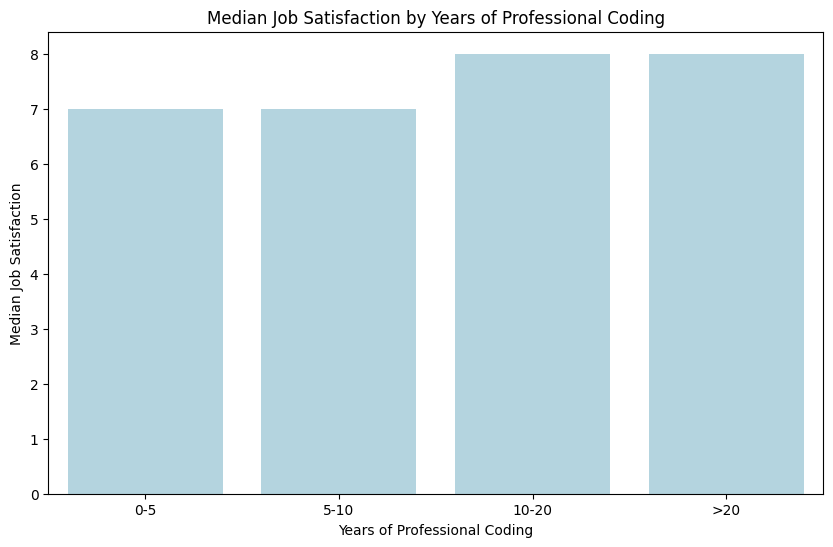

In [28]:
# Create figure and primary axes
plt.subplots(figsize=(10, 6))

sns.barplot(x='YearsCodeProBins', y='JobSat_median', data=df_grouped, color='lightblue')
plt.ylabel('Median Job Satisfaction')
plt.xlabel('Years of Professional Coding')
plt.title('Median Job Satisfaction by Years of Professional Coding')

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [29]:
df['JobSat'].value_counts()

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64

<Axes: xlabel='JobSat', ylabel='Count'>

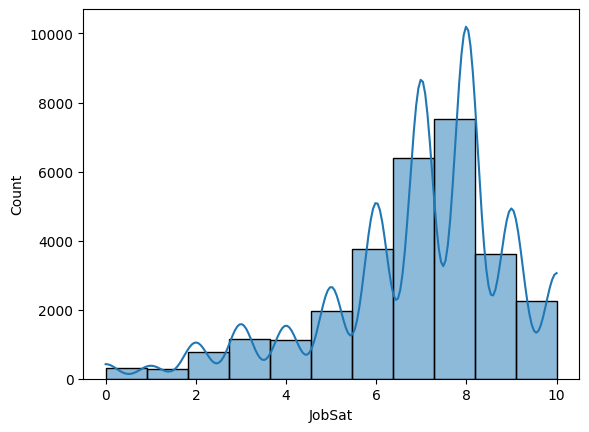

In [41]:
## Write your code here
plt.Figure(figsize=(10, 6))
sns.histplot(data=df, x='JobSat', bins=11, kde=True)

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


In [43]:
## Write your code here
mapping = {
           'I prefer not to say': 'Is_Emp_not_say', 
           'Student, full-time': 'Is_Emp_student_full', 
           'Not employed, but looking for work': 'Is_Emp_not_but_looking', 
           'Employed, full-time': 'Is_Emp_full_time', 
           'Retired': 'Is_Emp_retired', 
           'Not employed, and not looking for work': 'Is_Emp_not_and_not_looking', 
           'Employed, part-time': 'Is_Emp_part_time', 
           'Student, part-time': 'Is_Emp_student_part', 
           'Independent contractor, freelancer, or self-employed': 'Is_Emp_independent'
           }
for key, value in mapping.items():
    df[value] = df["Employment"].str.contains(key).astype(int)

In [59]:
df.drop(index=df[df['Is_Emp_not_say'] == 1].index, inplace=True)

In [61]:
df.drop(columns=['Is_Emp_not_say'], inplace=True)

Text(0.5, 1.0, 'Heatmap of Employment Status and Job Satisfaction by Remote Work Status')

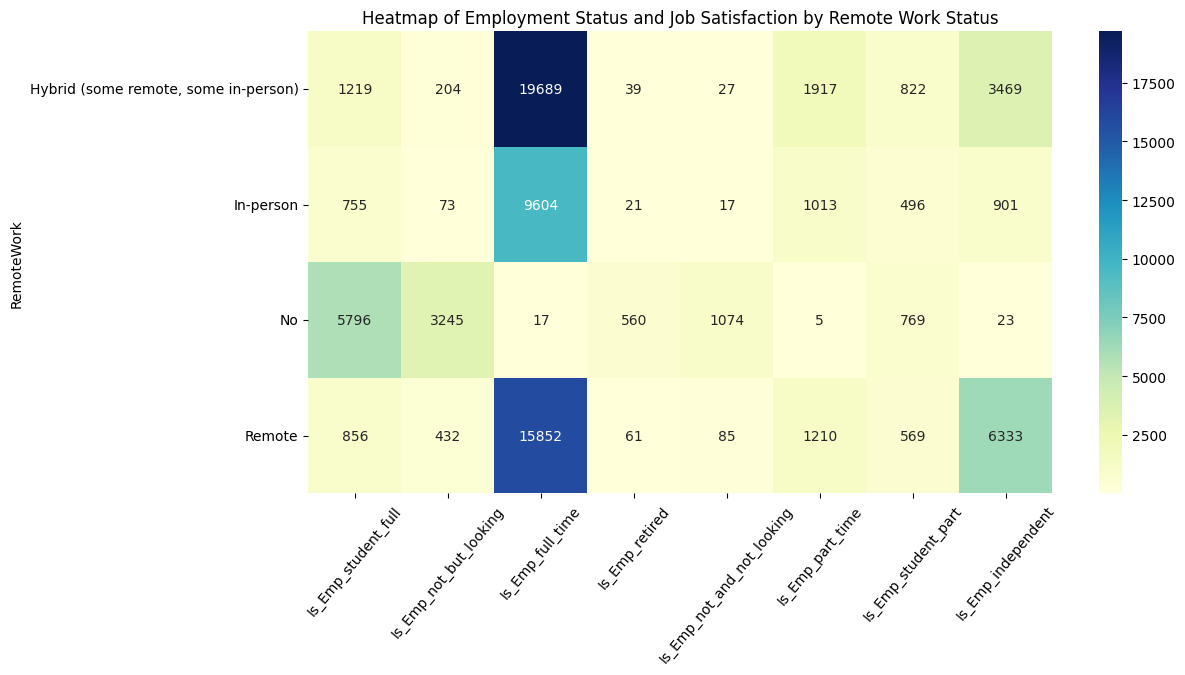

In [63]:
# lets create a HeatMap with columns: Is_Emp_not_say, Is_Emp_student_full, Is_Emp_not_but_looking, Is_Emp_full_time, Is_Emp_retired, Is_Emp_not_and_not_looking, Is_Emp_part_time, Is_Emp_student_part, Is_Emp_independent and JobSat
# And the rows are each unique value of RemoteWork
# the value is the count of occurrence
heatmap_data = df.groupby('RemoteWork')[[ 'Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 'Is_Emp_retired', 'Is_Emp_not_and_not_looking', 'Is_Emp_part_time', 'Is_Emp_student_part', 'Is_Emp_independent']].sum()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
# lets rotate the x labels 45 degrees
plt.xticks(rotation=50)
plt.title('Heatmap of Employment Status and Job Satisfaction by Remote Work Status')

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [85]:
## Write your code here
# df[['LanguageHaveWorkedWith']].dtypes

unique_language_set = set()
language_list = df['LanguageHaveWorkedWith'].unique().tolist()
for lang in language_list:
    lang = str(lang)
    temp = lang.split(';')
    unique_language_set.update(temp)
print("Unique Programming Languages:")
print(unique_language_set)

Unique Programming Languages:
{'Bash/Shell (all shells)', 'OCaml', 'Fortran', 'Zephyr', 'Solidity', 'Perl', 'C#', 'nan', 'Visual Basic (.Net)', 'MATLAB', 'Groovy', 'Prolog', 'Delphi', 'SQL', 'Dart', 'Rust', 'Cobol', 'Assembly', 'Elixir', 'Scala', 'Ruby', 'VBA', 'Go', 'Julia', 'C', 'Java', 'PHP', 'Lisp', 'Python', 'Objective-C', 'JavaScript', 'Haskell', 'R', 'F#', 'TypeScript', 'Nim', 'Lua', 'Ada', 'GDScript', 'HTML/CSS', 'Kotlin', 'Clojure', 'Crystal', 'C++', 'PowerShell', 'Zig', 'Apex', 'Swift', 'Erlang', 'MicroPython'}


In [88]:
popular_langs=[]
for lang in unique_language_set:
    count = df['LanguageHaveWorkedWith'].str.contains(lang).sum()
    if count > 3000:    
        popular_langs.append((lang, count))
        
popular_langs

C:\Users\akar\AppData\Local\Temp\ipykernel_35056\186838930.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = df['LanguageHaveWorkedWith'].str.contains(lang).sum()


[('C#', 16199),
 ('SQL', 30551),
 ('Dart', 3566),
 ('Rust', 7469),
 ('Assembly', 3175),
 ('Ruby', 3120),
 ('Go', 8045),
 ('C', 44740),
 ('Java', 42761),
 ('PHP', 10865),
 ('Python', 30537),
 ('JavaScript', 37225),
 ('R', 12008),
 ('TypeScript', 23020),
 ('Lua', 3654),
 ('HTML/CSS', 31568),
 ('Kotlin', 5618),
 ('C++', 44740),
 ('PowerShell', 8271)]

In [93]:
print("col: column dtype")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

col: column dtype
ResponseId: int64
MainBranch: object
Age: object
Employment: object
RemoteWork: object
Check: object
CodingActivities: object
EdLevel: object
LearnCode: object
LearnCodeOnline: object
TechDoc: object
YearsCode: object
YearsCodePro: float64
DevType: object
OrgSize: object
PurchaseInfluence: object
BuyNewTool: object
BuildvsBuy: object
TechEndorse: object
Country: object
Currency: object
CompTotal: float64
LanguageHaveWorkedWith: object
LanguageWantToWorkWith: object
LanguageAdmired: object
DatabaseHaveWorkedWith: object
DatabaseWantToWorkWith: object
DatabaseAdmired: object
PlatformHaveWorkedWith: object
PlatformWantToWorkWith: object
PlatformAdmired: object
WebframeHaveWorkedWith: object
WebframeWantToWorkWith: object
WebframeAdmired: object
EmbeddedHaveWorkedWith: object
EmbeddedWantToWorkWith: object
EmbeddedAdmired: object
MiscTechHaveWorkedWith: object
MiscTechWantToWorkWith: object
MiscTechAdmired: object
ToolsTechHaveWorkedWith: object
ToolsTechWantToWorkWith: o

In [ ]:
mapping = {
    'C#': "WorkedWith_C#",
    'SQL': "WorkedWith_SQL",
    'Dart': "WorkedWith_Dart",
    'Rust': "WorkedWith_Rust",
    'Assembly': "WorkedWith_Assembly",
    'Ruby': "WorkedWith_Ruby",
    'Go': "WorkedWith_Go",
    'C': "WorkedWith_C",
    'Java': "WorkedWith_Java",
    'PHP': "WorkedWith_PHP",
    'Python': "WorkedWith_Python",
    'JavaScript': "WorkedWith_JavaScript",
    'R': "WorkedWith_R",
    'TypeScript': "WorkedWith_TypeScript",
    'Lua': "WorkedWith_Lua",
    'HTML/CSS': "WorkedWith_HTML/CSS",
    'Kotlin': "WorkedWith_Kotlin",
    'C++': "WorkedWith_C++",
    'PowerShell': "WorkedWith_PowerShell"
}

for key, value in mapping.items():
    df[value] = df["LanguageHaveWorkedWith"].str.contains(key).astype("Int64")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,YearsCodeProBins,Is_Emp_student_full,Is_Emp_not_but_looking,Is_Emp_full_time,Is_Emp_retired,Is_Emp_not_and_not_looking,Is_Emp_part_time,Is_Emp_student_part,Is_Emp_independent,Is_C#,Is_SQL,Is_Dart,Is_Rust,Is_Assembly,Is_Ruby,Is_Go,Is_C,Is_Java,Is_PHP,Is_Python,Is_JavaScript,Is_R,Is_TypeScript,Is_Lua,Is_HTML/CSS,Is_Kotlin,Is_C++,Is_PowerShell,C#,SQL,Dart,Rust,Assembly,Ruby,Go,C,Java,PHP,Python,JavaScript,R,TypeScript,Lua,HTML/CSS,Kotlin,C++,PowerShell
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,10.184344,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5-10,0,0,1,0,0,0,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17.000000,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,N

In [121]:

heatmap_data_lang_region = df.groupby('Country')[["C#", "SQL","Dart", "Rust", "Assembly", "Ruby", "Go",
    "C", "Java", "PHP", "Python", "JavaScript",
    "R", "TypeScript", "Lua", "HTML/CSS", "Kotlin",
    "C++", "PowerShell"]].sum()



Programming Language Usage by Country:
             C#  SQL  Dart  Rust  Assembly  Ruby  Go   C  Java  PHP  Python  \
Country                                                                       
Afghanistan   8   21     7     7         7     3   7  30    27   15      23   
Albania      12   28     0     1         1     0   5  31    31   16      10   
Algeria      14   35    14     3         7     0   0  57    56   20      37   
Andorra       6    8     2     2         0     0   2   9     8    5       8   
Angola        4    8     3     1         1     1   1  10    10    4       9   

             JavaScript  R  TypeScript  Lua  HTML/CSS  Kotlin  C++  PowerShell  
Country                                                                         
Afghanistan          24  7          12    4        24       5   30           5  
Albania              26  2          14    1        25       4   31           4  
Algeria              53  4          32    3        52       7   57           7  
An

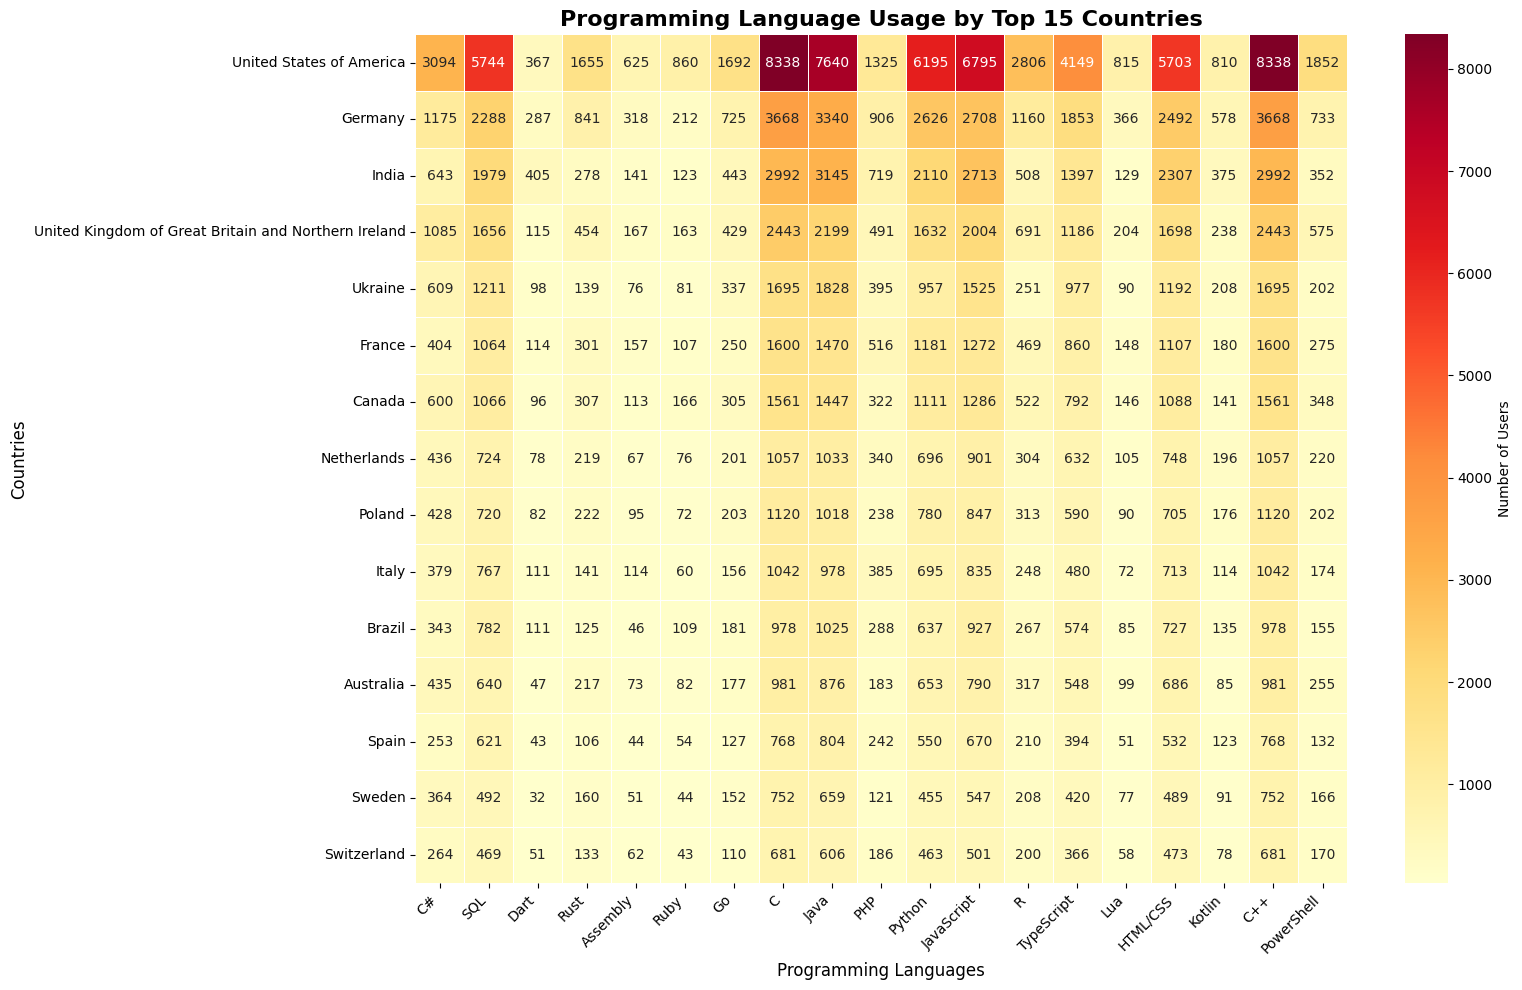


Top 5 Most Popular Languages Overall:
C             43288.0
C++           43288.0
Java          41298.0
JavaScript    35973.0
HTML/CSS      30532.0
dtype: float64

Top 5 Countries with Most Programming Language Usage:
Country
United States of America                                68803.0
Germany                                                 29944.0
India                                                   23751.0
United Kingdom of Great Britain and Northern Ireland    19873.0
Ukraine                                                 13566.0
dtype: float64

Data shape: (184, 19)
Data types:
C#            float64
SQL           float64
Dart          float64
Rust          float64
Assembly      float64
Ruby          float64
Go            float64
C             float64
Java          float64
PHP           float64
Python        float64
JavaScript    float64
R             float64
TypeScript    float64
Lua           float64
HTML/CSS      float64
Kotlin        float64
C++           float64
PowerSh

In [122]:
# Display the data and create a heatmap visualization
print("Programming Language Usage by Country:")
print(heatmap_data_lang_region.head())

# Clean the data to fix TypeError
# Fill any NaN values with 0 and ensure all values are numeric
heatmap_data_clean = heatmap_data_lang_region.fillna(0).astype(float)

# Create a heatmap for programming language usage by region
plt.figure(figsize=(16, 10))

# Select top countries with most responses for better visualization
top_countries = heatmap_data_clean.sum(axis=1).nlargest(15).index
heatmap_subset = heatmap_data_clean.loc[top_countries]

# Ensure the subset data is also clean
heatmap_subset = heatmap_subset.fillna(0).astype(float)

# Create the heatmap
sns.heatmap(heatmap_subset, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Users'},
            linewidths=0.5)

plt.title('Programming Language Usage by Top 15 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Show summary statistics
print("\nTop 5 Most Popular Languages Overall:")
language_totals = heatmap_data_clean.sum().sort_values(ascending=False)
print(language_totals.head())

print("\nTop 5 Countries with Most Programming Language Usage:")
country_totals = heatmap_data_clean.sum(axis=1).sort_values(ascending=False)
print(country_totals.head())

# Debug information
print(f"\nData shape: {heatmap_data_clean.shape}")
print(f"Data types:\n{heatmap_data_clean.dtypes}")
print(f"Any NaN values remaining: {heatmap_data_clean.isnull().sum().sum()}")

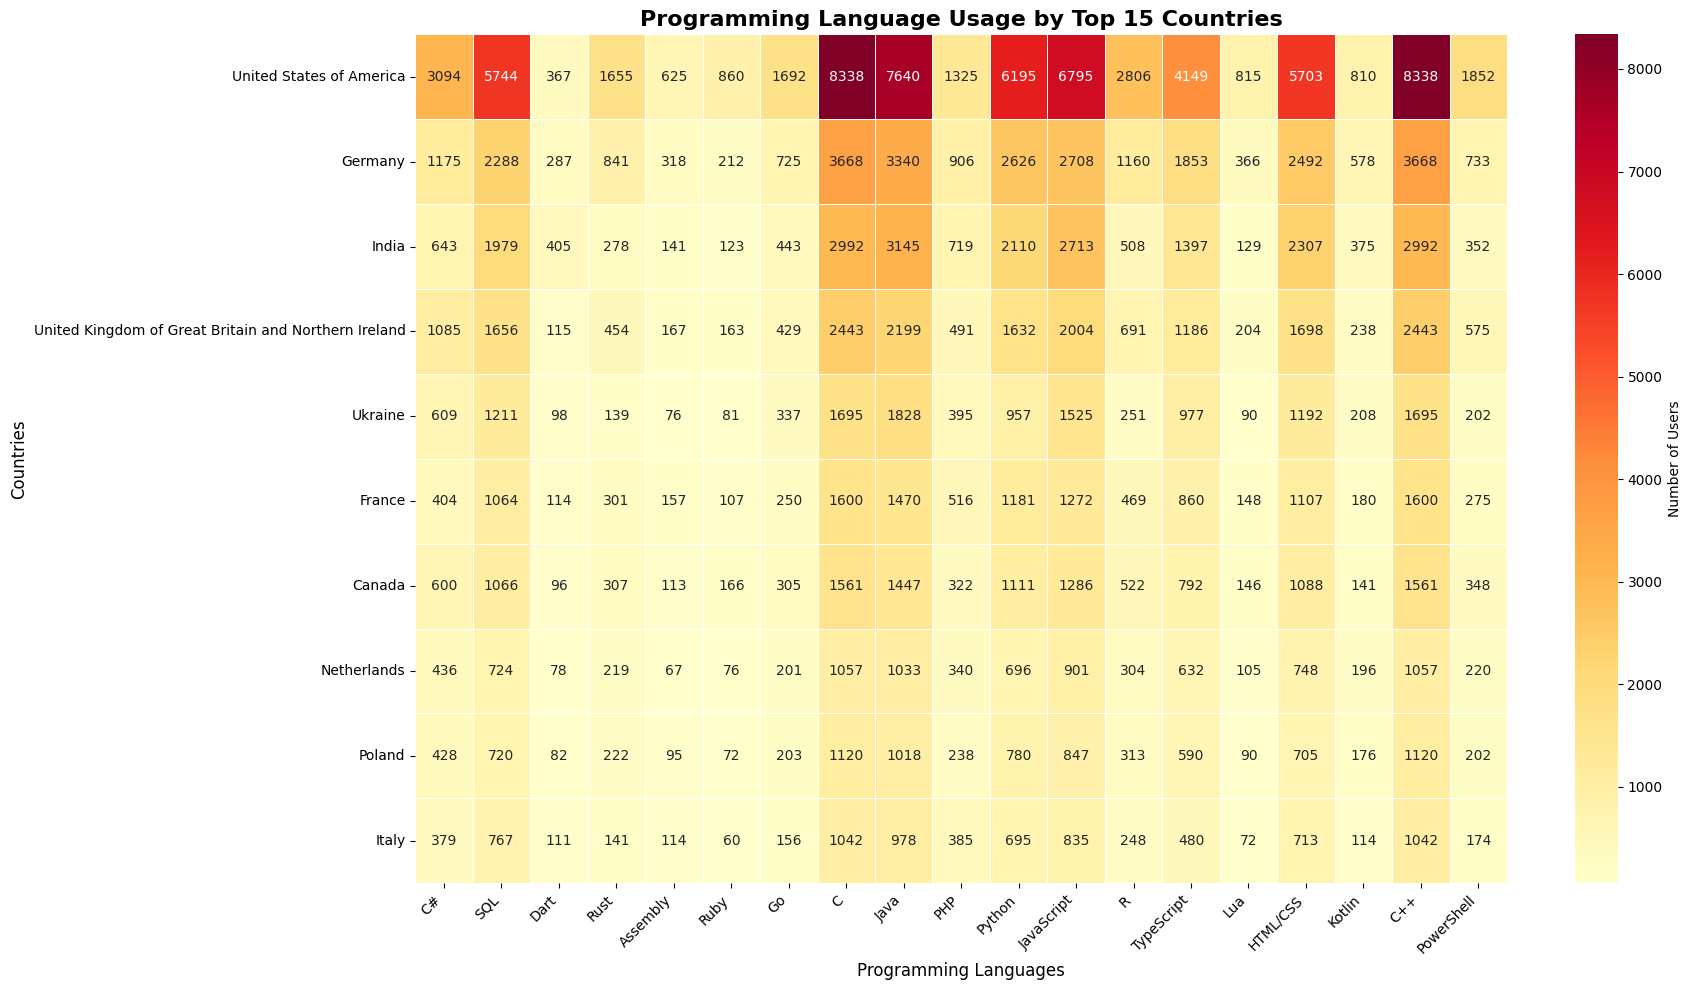

In [140]:
plt.figure(figsize=(18,10))
heatmap_data_clean = heatmap_data_lang_region.fillna(0).astype(float)
top_countries = heatmap_data_clean.sum(axis=1).nlargest(10).index
heatmap_subset = heatmap_data_clean.loc[top_countries]
# sns.heatmap(heatmap_subset, cmap="YlGnBu", annot=True, fmt=".0f")
sns.heatmap(heatmap_subset, 
            annot=True, 
            fmt='.0f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Users'},
            linewidths=0.5)

plt.title('Programming Language Usage by Top 15 Countries', fontsize=16, fontweight='bold')
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Countries', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# heatmap_data_clean = heatmap_data_lang_region.fillna(0).astype(float)

# # Create a heatmap for programming language usage by region
# plt.figure(figsize=(16, 10))

# # Select top countries with most responses for better visualization
# top_countries = heatmap_data_clean.sum(axis=1).nlargest(15).index
# heatmap_subset = heatmap_data_clean.loc[top_countries]

# # Ensure the subset data is also clean
# # heatmap_subset = heatmap_subset.fillna(0).astype(float)

# # Create the heatmap
# sns.heatmap(heatmap_subset, 
#             annot=True, 
#             fmt='.0f', 
#             cmap='YlOrRd',
#             cbar_kws={'label': 'Number of Users'},
#             linewidths=0.5)

# plt.title('Programming Language Usage by Top 15 Countries', fontsize=16, fontweight='bold')
# plt.xlabel('Programming Languages', fontsize=12)
# plt.ylabel('Countries', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [151]:
## Write your code here
print(f"df.columns: {[col for col in df.columns if 'job' in col.lower()]}")

df.columns: ['JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSat']


<Axes: xlabel='YearsCodePro', ylabel='JobSatPoints_1'>

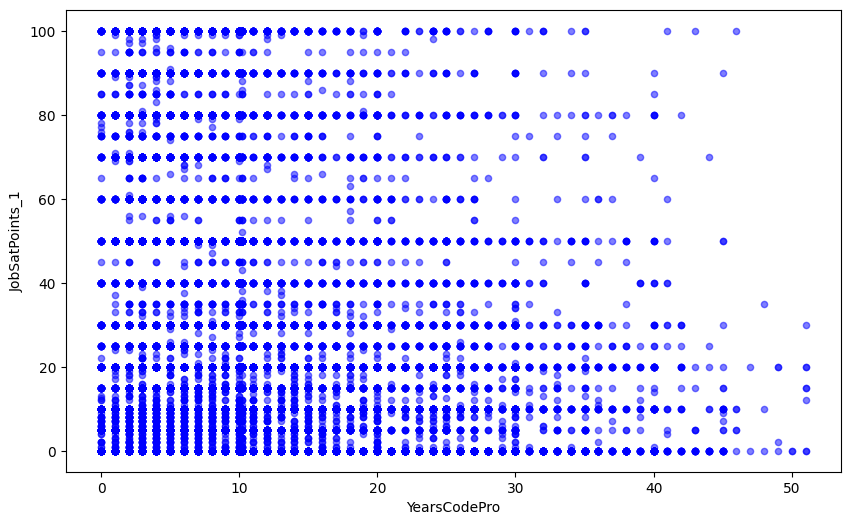

In [155]:
df.plot(kind='scatter', x='YearsCodePro', y='JobSatPoints_1', alpha=0.5, color='blue', figsize=(10,6))

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [168]:
## Write your code here
# Standardize EdLevel entries
education_mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's degree", 
    "Some college/university study without earning a degree": "Some college",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree",
    "Primary/elementary school": "Primary school",
    "Something else": "Other"
}

# Apply the mapping to standardize EdLevel
df['EdLevel'] = df['EdLevel'].map(education_mapping).fillna(df['EdLevel'])

# Display the updated EdLevel value counts
print("Standardized EdLevel values:")
print(df['EdLevel'].value_counts())

Standardized EdLevel values:
EdLevel
Bachelor's degree      24846
Master's degree        15504
Some college            7600
Secondary school        5701
Professional degree     2941
Associate degree        1784
Primary school          1095
Other                    849
Name: count, dtype: int64


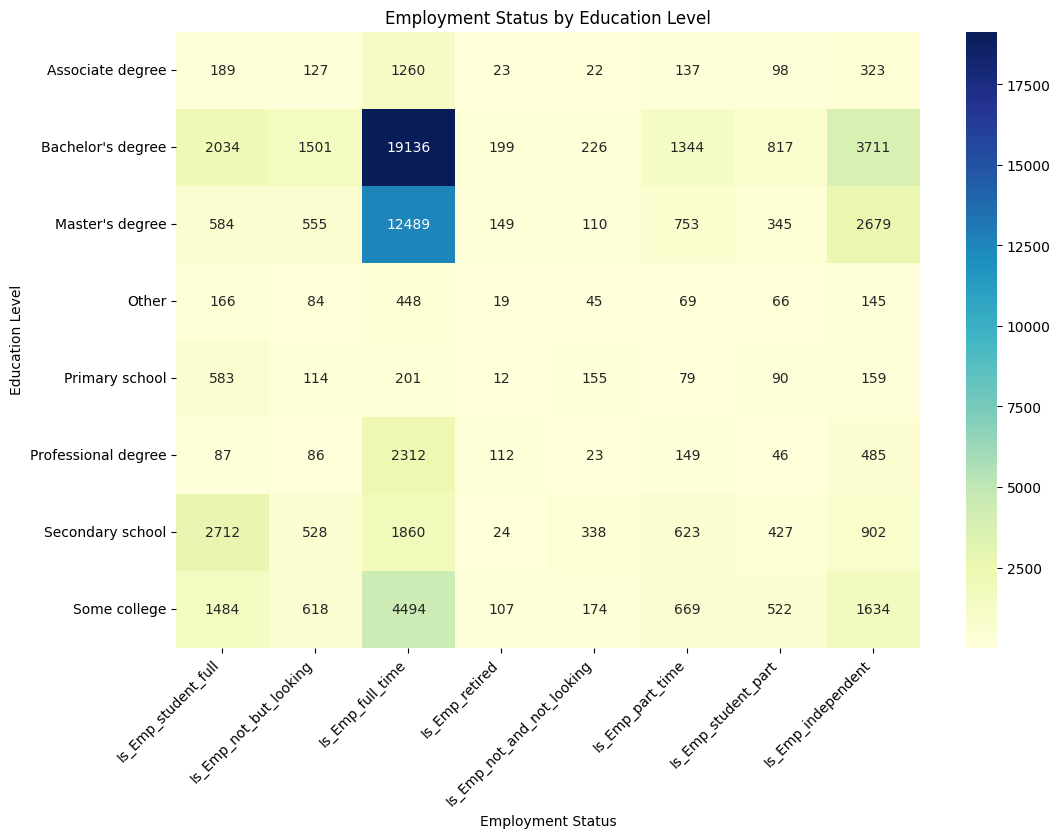

In [169]:
## Write your code here
df_grouped = df.groupby('EdLevel')[[ 'Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 'Is_Emp_retired', 'Is_Emp_not_and_not_looking', 'Is_Emp_part_time', 'Is_Emp_student_part', 'Is_Emp_independent']].sum()
plt.figure(figsize=(12, 8))
sns.heatmap(df_grouped, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Employment Status by Education Level')
plt.xlabel('Employment Status')
plt.ylabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.show()


In [170]:
# Group by education level and sum employment indicators
df_grouped = df.groupby('EdLevel')[[ 'Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 'Is_Emp_retired', 'Is_Emp_not_and_not_looking', 'Is_Emp_part_time', 'Is_Emp_student_part', 'Is_Emp_independent']].sum()

print("Employment Distribution by Education Level:")
print("=" * 50)
print(df_grouped)

# Calculate percentages for better understanding
df_grouped_pct = df.groupby('EdLevel')[[ 'Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 'Is_Emp_retired', 'Is_Emp_not_and_not_looking', 'Is_Emp_part_time', 'Is_Emp_student_part', 'Is_Emp_independent']].mean() * 100

print("\n\nEmployment Percentages by Education Level:")
print("=" * 50)
print(df_grouped_pct.round(2))

# Additional analysis: Full-time employment rates by education level
print("\n\nFull-time Employment Rate Analysis:")
print("=" * 40)
fulltime_rates = df.groupby('EdLevel')['Is_Emp_full_time'].agg(['sum', 'count', 'mean']).round(3)
fulltime_rates['percentage'] = (fulltime_rates['mean'] * 100).round(1)
fulltime_rates.columns = ['Full_time_count', 'Total_respondents', 'Rate', 'Percentage']
print(fulltime_rates)

# Key insights
print("\n\nKey Insights:")
print("=" * 20)
highest_fulltime = fulltime_rates['Percentage'].idxmax()
lowest_fulltime = fulltime_rates['Percentage'].idxmin()
print(f"• Highest full-time employment rate: {highest_fulltime} ({fulltime_rates.loc[highest_fulltime, 'Percentage']}%)")
print(f"• Lowest full-time employment rate: {lowest_fulltime} ({fulltime_rates.loc[lowest_fulltime, 'Percentage']}%)")

# Student analysis
student_analysis = df.groupby('EdLevel')[['Is_Emp_student_full', 'Is_Emp_student_part']].sum()
print(f"\n• Education levels with most students:")
total_students = student_analysis.sum(axis=1).sort_values(ascending=False)
for edu_level, count in total_students.head(3).items():
    print(f"  - {edu_level}: {count} students")

# Independent contractor analysis
independent_analysis = df.groupby('EdLevel')['Is_Emp_independent'].mean() * 100
print(f"\n• Top education levels for independent work:")
for edu_level, pct in independent_analysis.sort_values(ascending=False).head(3).items():
    print(f"  - {edu_level}: {pct:.1f}%")

Employment Distribution by Education Level:
                     Is_Emp_student_full  Is_Emp_not_but_looking  \
EdLevel                                                            
Associate degree                     189                     127   
Bachelor's degree                   2034                    1501   
Master's degree                      584                     555   
Other                                166                      84   
Primary school                       583                     114   
Professional degree                   87                      86   
Secondary school                    2712                     528   
Some college                        1484                     618   

                     Is_Emp_full_time  Is_Emp_retired  \
EdLevel                                                 
Associate degree                 1260              23   
Bachelor's degree               19136             199   
Master's degree                 12489          

<Figure size 1400x800 with 0 Axes>

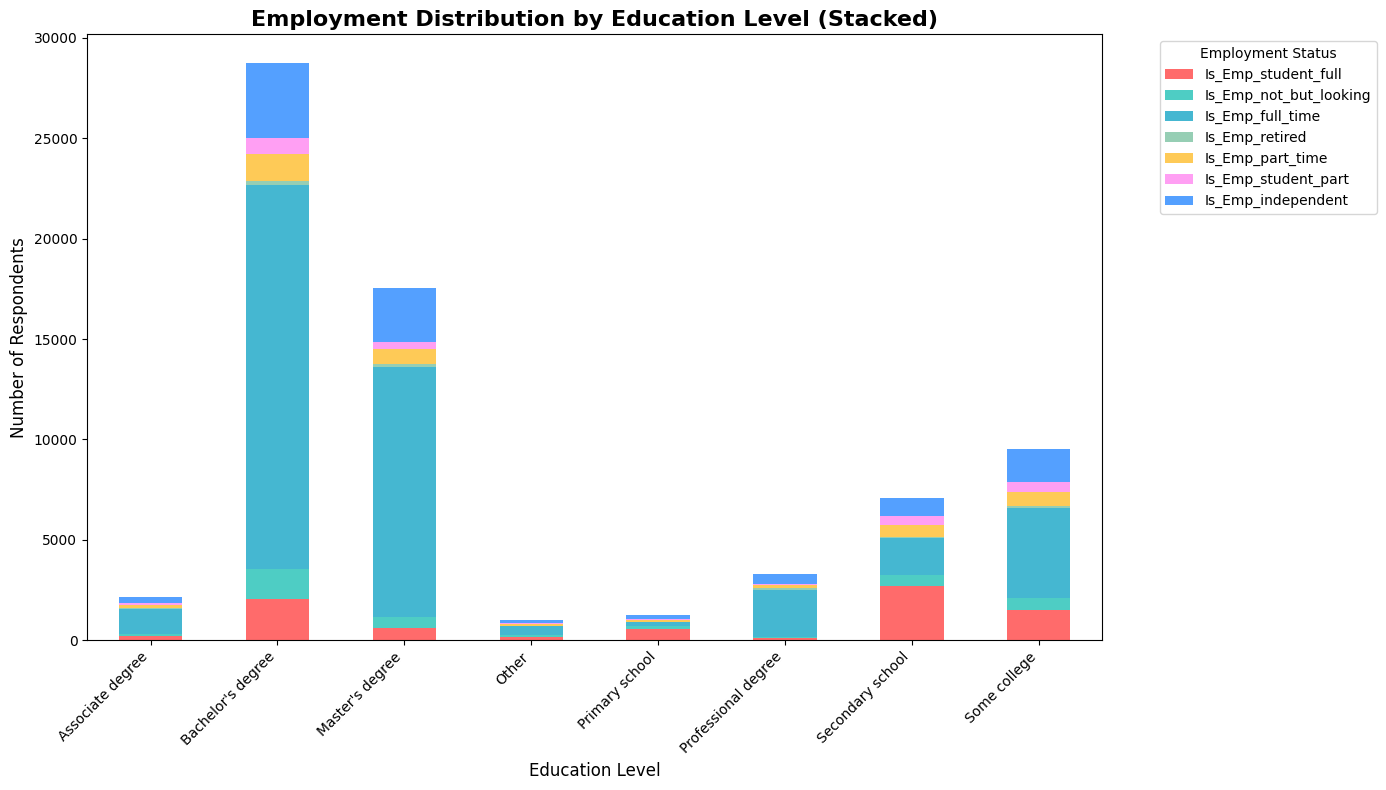

<Figure size 1400x800 with 0 Axes>

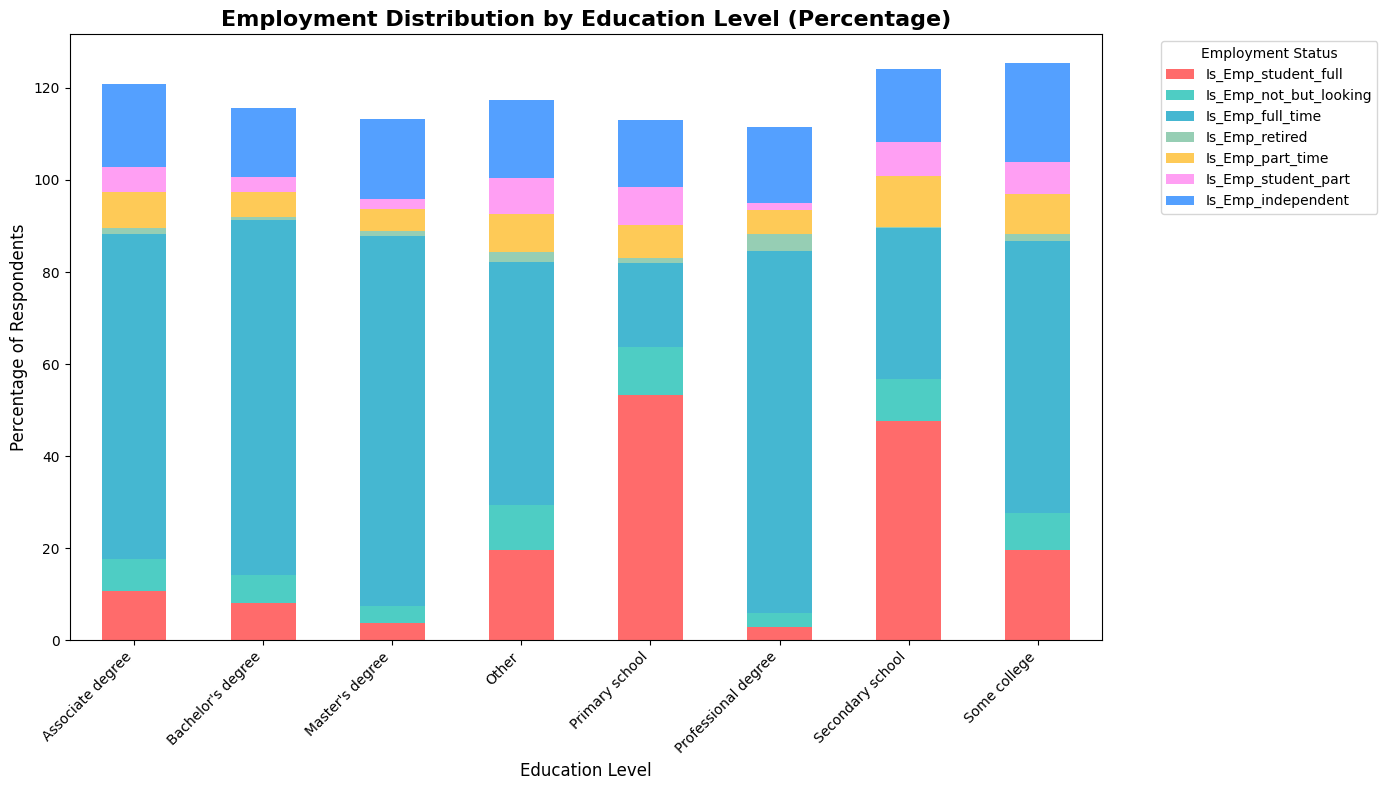

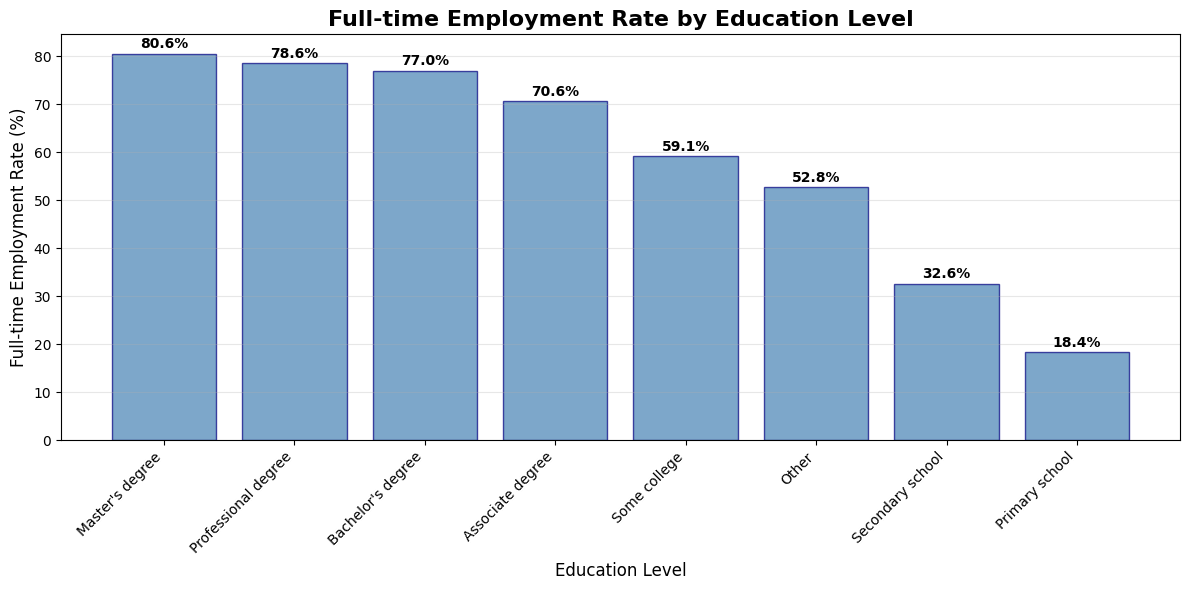

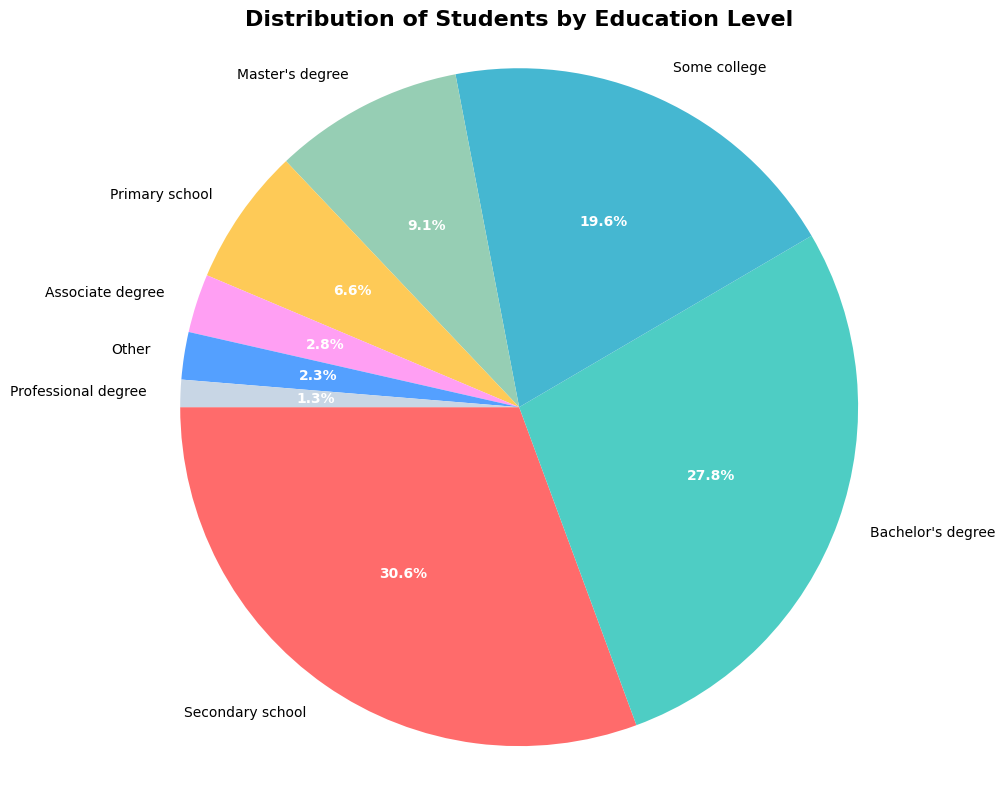

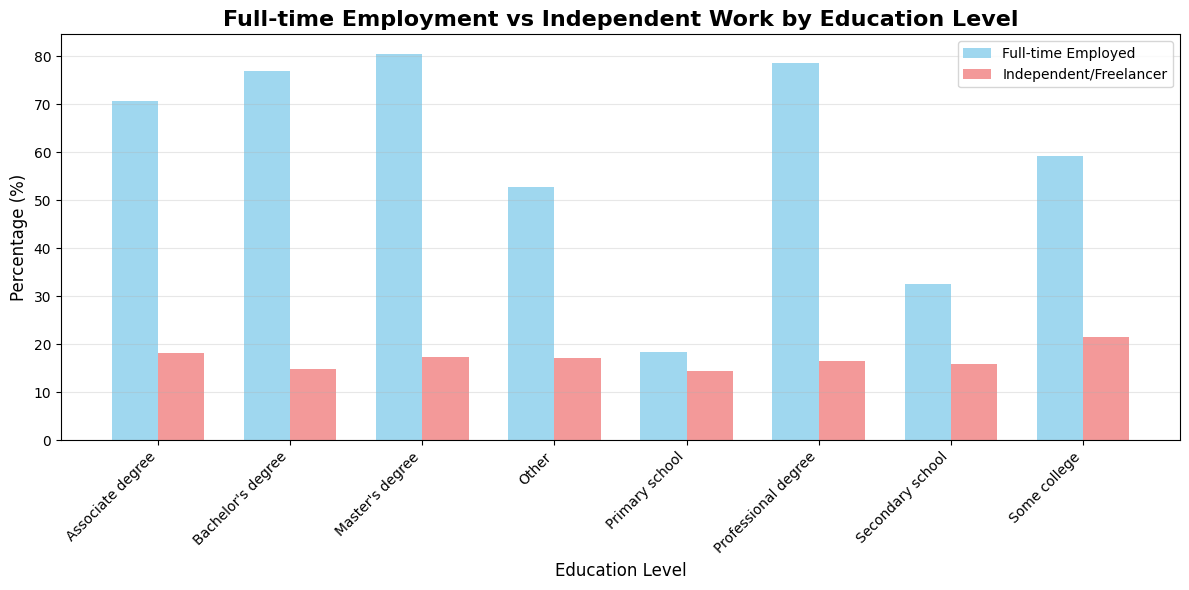

✅ All visualizations completed!
These charts provide comprehensive insights into how educational background relates to employment patterns.


In [175]:
# Additional Visualizations for Educational Background and Employment Analysis

# 1. Stacked Bar Chart - Employment Distribution by Education Level
plt.figure(figsize=(14, 8))
df_grouped_viz = df.groupby('EdLevel')[['Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 
                                        'Is_Emp_retired', 'Is_Emp_part_time', 'Is_Emp_student_part', 
                                        'Is_Emp_independent']].sum()

# Create stacked bar chart
ax = df_grouped_viz.plot(kind='bar', stacked=True, figsize=(14, 8), 
                        color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF'])
plt.title('Employment Distribution by Education Level (Stacked)', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 2. Percentage Stacked Bar Chart
plt.figure(figsize=(14, 8))
df_grouped_pct_viz = df.groupby('EdLevel')[['Is_Emp_student_full', 'Is_Emp_not_but_looking', 'Is_Emp_full_time', 
                                            'Is_Emp_retired', 'Is_Emp_part_time', 'Is_Emp_student_part', 
                                            'Is_Emp_independent']].mean() * 100

ax = df_grouped_pct_viz.plot(kind='bar', stacked=True, figsize=(14, 8),
                            color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF'])
plt.title('Employment Distribution by Education Level (Percentage)', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage of Respondents', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Full-time Employment Rate by Education Level
plt.figure(figsize=(12, 6))
fulltime_rates_viz = df.groupby('EdLevel')['Is_Emp_full_time'].mean() * 100
fulltime_rates_viz = fulltime_rates_viz.sort_values(ascending=False)

bars = plt.bar(range(len(fulltime_rates_viz)), fulltime_rates_viz.values, 
               color='steelblue', alpha=0.7, edgecolor='navy', linewidth=1)
plt.title('Full-time Employment Rate by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Full-time Employment Rate (%)', fontsize=12)
plt.xticks(range(len(fulltime_rates_viz)), fulltime_rates_viz.index, rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Student Distribution Pie Chart
plt.figure(figsize=(10, 8))
student_totals = df.groupby('EdLevel')[['Is_Emp_student_full', 'Is_Emp_student_part']].sum().sum(axis=1)
student_totals = student_totals[student_totals > 0].sort_values(ascending=False)

# colors = plt.cm.Set3(range(len(student_totals)))
colors =['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3', '#54A0FF', '#C8D6E5']
wedges, texts, autotexts = plt.pie(student_totals.values, labels=student_totals.index, autopct='%1.1f%%',
                                  colors=colors,
                                  startangle=180)

plt.title('Distribution of Students by Education Level', fontsize=16, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

# 5. Independent Work vs Full-time Employment Comparison
plt.figure(figsize=(12, 6))
comparison_data = df.groupby('EdLevel')[['Is_Emp_full_time', 'Is_Emp_independent']].mean() * 100

x = range(len(comparison_data.index))
width = 0.35

plt.bar([i - width/2 for i in x], comparison_data['Is_Emp_full_time'], 
        width, label='Full-time Employed', color='skyblue', alpha=0.8)
plt.bar([i + width/2 for i in x], comparison_data['Is_Emp_independent'], 
        width, label='Independent/Freelancer', color='lightcoral', alpha=0.8)

plt.title('Full-time Employment vs Independent Work by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(x, comparison_data.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ All visualizations completed!")
print("These charts provide comprehensive insights into how educational background relates to employment patterns.")

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [176]:
# Write your code here
# Save the cleaned and analyzed dataset
output_filename = 'survey_data_cleaned_analyzed.csv'
df.to_csv(output_filename, index=False)
print(f"Dataset saved as '{output_filename}'")

# Print summary of the final dataset
print(f"\nFinal dataset summary:")
print(f"Shape: {df.shape}")
print(f"Columns: {len(df.columns)}")
print(f"Missing values per column:")
print(df.isnull().sum().sum())

# Show the new columns created during analysis
new_columns = [col for col in df.columns if col.startswith('Is_') or col in ['YearsCodeProBins']]
print(f"\nNew analytical columns created: {len(new_columns)}")
for col in new_columns:
    print(f"  - {col}")

print(f"\nDataset successfully saved and ready for further analysis!")

Dataset saved as 'survey_data_cleaned_analyzed.csv'

Final dataset summary:
Shape: (64891, 161)
Columns: 161
Missing values per column:
3038574

New analytical columns created: 28
  - YearsCodeProBins
  - Is_Emp_student_full
  - Is_Emp_not_but_looking
  - Is_Emp_full_time
  - Is_Emp_retired
  - Is_Emp_not_and_not_looking
  - Is_Emp_part_time
  - Is_Emp_student_part
  - Is_Emp_independent
  - Is_C#
  - Is_SQL
  - Is_Dart
  - Is_Rust
  - Is_Assembly
  - Is_Ruby
  - Is_Go
  - Is_C
  - Is_Java
  - Is_PHP
  - Is_Python
  - Is_JavaScript
  - Is_R
  - Is_TypeScript
  - Is_Lua
  - Is_HTML/CSS
  - Is_Kotlin
  - Is_C++
  - Is_PowerShell

Dataset successfully saved and ready for further analysis!


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
